KNN Classification Using 8 features on a dataset called Diabetes dataset.

K value we got is 7

Distance measure we used is Euclidean Distance

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
## read the data
df = pd.read_csv('S:/WInterSem/ML_Techniques/KNN&Mining/diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
## basic analysis of data
print(df.shape)  # how many rows and columns

(768, 9)


In [4]:
## first 8 columns represent features and last column represent target
x = df.drop('Outcome',axis=1).values
y = df['Outcome'].values

In [5]:
## split the data into train and test
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.4,random_state=42, stratify=y)

In [6]:
## import classifier
from sklearn.neighbors import KNeighborsClassifier
neighbors = np.arange(1,9)
train_accuracy =np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))

for i,k in enumerate(neighbors):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(x_train, y_train)
    
    #Compute accuracy on the training set
    train_accuracy[i] = knn.score(x_train, y_train)
    
    #Compute accuracy on the test set
    test_accuracy[i] = knn.score(x_test, y_test)

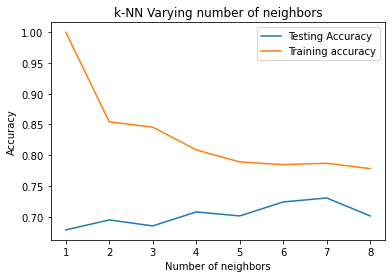

In [7]:
plt.title('k-NN Varying number of neighbors')
plt.plot(neighbors, test_accuracy, label='Testing Accuracy')
plt.plot(neighbors, train_accuracy, label='Training accuracy')
plt.legend()
plt.xlabel('Number of neighbors')
plt.ylabel('Accuracy')
plt.show()

In [8]:
## from the graph we got k as 7 that is max testing accuracy
## Setup a knn classifier with k neighbors
knn = KNeighborsClassifier(n_neighbors=7)

#Fit the model
knn.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=7)

In [9]:
## test accuracy of test data
knn.score(x_test,y_test)

0.7305194805194806

In [10]:
## confusion matrix
from sklearn.metrics import confusion_matrix

y_pred = knn.predict(x_test)
confusion_matrix(y_test,y_pred)

array([[165,  36],
       [ 47,  60]], dtype=int64)

In [11]:
from sklearn.metrics import classification_report

print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.78      0.82      0.80       201
           1       0.62      0.56      0.59       107

    accuracy                           0.73       308
   macro avg       0.70      0.69      0.70       308
weighted avg       0.73      0.73      0.73       308



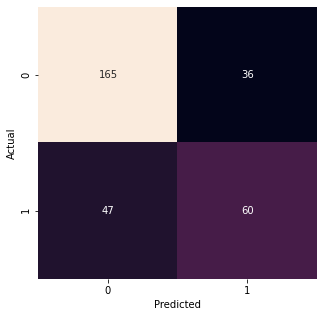

In [18]:
# Creating confusion matrix
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(5,5))
sns.heatmap(cm, cbar=False, fmt='d', annot=True)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()